In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'rahulshah8383'
os.environ['KAGGLE_KEY'] = '0022fa82939ca1ef76bbbb25a20ddeff'

In [3]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 99% 206M/207M [00:11<00:00, 22.6MB/s]
100% 207M/207M [00:11<00:00, 18.2MB/s]


In [4]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [5]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_No_mask_dir = os.path.join(train_dir,'Non Mask')

In [6]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[0:10])

['0022.jpg', '1041.jpg', '0127.jpg', '0626.jpg', '1493.jpg', '1115.jpg', '1527.jpg', '0737.jpg', '0286.jpg', '1577.jpg']


In [7]:
train_No_mask_names = os.listdir(train_No_mask_dir)
print(train_No_mask_names[0:10])

['181.jpg', '344.jpg', '172.jpg', '153.jpg', '2.jpg', '37.jpg', '106.jpg', '49.jpg', '40.jpg', '340.jpg']


In [8]:
mask_images = []

for i in train_mask_names:
  mask_images.append(os.path.join(train_mask_dir,i))

non_mask_images=[]

for i in train_No_mask_names:
  non_mask_images.append(os.path.join(train_No_mask_dir,i))

In [9]:
import plotly.express as px
from skimage import io
from skimage.transform import resize

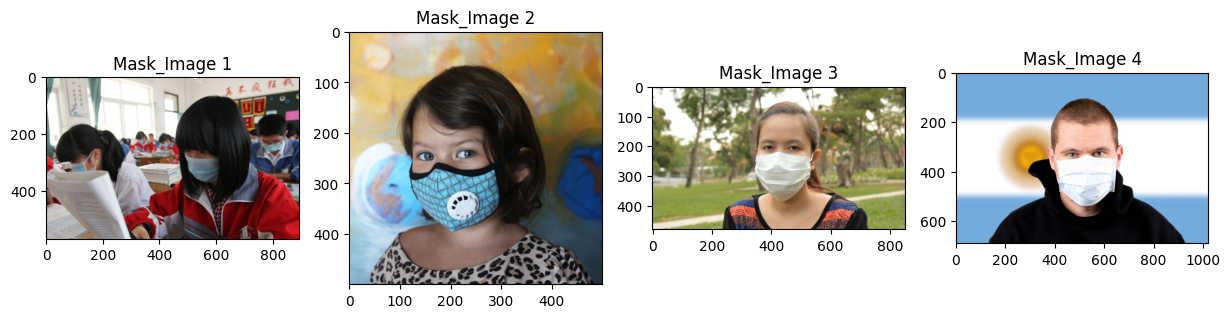

In [10]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
img1 = io.imread(mask_images[0])
img2 = io.imread(mask_images[1])
img3 = io.imread(mask_images[2])
img4 = io.imread(mask_images[3])

ax[0].imshow(img1)
ax[0].set_title("Mask_Image 1")

ax[1].imshow(img2)
ax[1].set_title("Mask_Image 2")

ax[2].imshow(img3)
ax[2].set_title("Mask_Image 3")

ax[3].imshow(img4)
ax[3].set_title("Mask_Image 4")


plt.show()


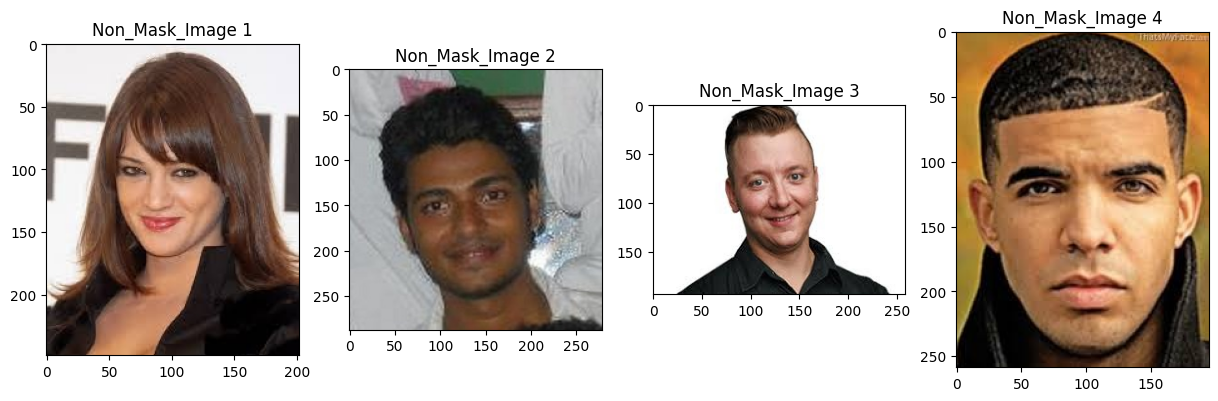

In [11]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
img1 = io.imread(non_mask_images[0])
img2 = io.imread(non_mask_images[1])
img3 = io.imread(non_mask_images[2])
img4 = io.imread(non_mask_images[3])

ax[0].imshow(img1)
ax[0].set_title("Non_Mask_Image 1")

ax[1].imshow(img2)
ax[1].set_title("Non_Mask_Image 2")

ax[2].imshow(img3)
ax[2].set_title("Non_Mask_Image 3")

ax[3].imshow(img4)
ax[3].set_title("Non_Mask_Image 4")


plt.show()


In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   rotation_range=25,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(300,300),
                                                  batch_size=32,
                                                  class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [14]:
train_generator.image_shape

(300, 300, 3)

In [15]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(300,300,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 150, 150, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 75, 75, 64)        0

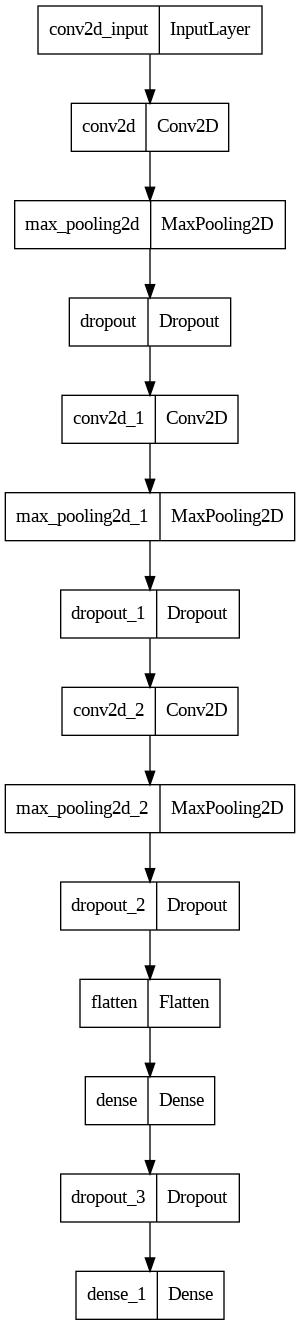

In [24]:
from keras.utils import plot_model
plot_model(model)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [18]:
model_train = model.fit(train_generator,epochs=25,
          validation_data=valid_generator,
          batch_size=32)

Epoch 1/25
19/19 [==============================] - 30s 1s/step - loss: 0.8725 - accuracy: 0.5450 - val_loss: 0.6897 - val_accuracy: 0.5556
Epoch 2/25
19/19 [==============================] - 19s 989ms/step - loss: 0.6810 - accuracy: 0.5817 - val_loss: 0.6906 - val_accuracy: 0.5229
Epoch 3/25
19/19 [==============================] - 19s 1s/step - loss: 0.6484 - accuracy: 0.6150 - val_loss: 0.6897 - val_accuracy: 0.5196
Epoch 4/25
19/19 [==============================] - 19s 994ms/step - loss: 0.6167 - accuracy: 0.6683 - val_loss: 0.6870 - val_accuracy: 0.5392
Epoch 5/25
19/19 [==============================] - 20s 1s/step - loss: 0.5983 - accuracy: 0.6833 - val_loss: 0.6785 - val_accuracy: 0.6438
Epoch 6/25
19/19 [==============================] - 19s 992ms/step - loss: 0.5680 - accuracy: 0.7233 - val_loss: 0.6597 - val_accuracy: 0.7190
Epoch 7/25
19/19 [==============================] - 19s 999ms/step - loss: 0.5149 - accuracy: 0.7800 - val_loss: 0.6282 - val_accuracy: 0.7810
Epoch 8/

In [23]:
model.save("model_01.h5")

In [19]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)

In [20]:
metrics.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.872490,0.545000,0.689697,0.555556
1,0.681047,0.581667,0.690561,0.522876
2,0.648357,0.615000,0.689741,0.519608
3,0.616720,0.668333,0.686957,0.539216
4,0.598271,0.683333,0.678490,0.643791
5,0.567981,0.723333,0.659717,0.718954
6,0.514886,0.780000,0.628223,0.781046
7,0.448405,0.791667,0.585107,0.810458
8,0.461323,0.795000,0.569165,0.833333
9,0.388056,0.845000,0.528719,0.846405


In [30]:
test_loss, test_accuracy = model.evaluate_generator(test_generator)

# Print test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")

Test Loss: 0.3580
Test Accuracy: 88.00%


In [22]:
print('test_loss: ',test_loss)
print('test_accuracy: ',test_accuracy)

test_loss:  0.3579702377319336
test_accuracy:  0.8799999952316284


In [29]:
# Print training and validation loss history
print("Training Loss: {:.4f}".format(model_train.history['loss'][-1]))
print("Training Accuracy: {:.2%}".format(model_train.history['accuracy'][-1]))

print("\nValidation Loss: {:.4f}".format(model_train.history['val_loss'][-1]))
print("Validation Accuracy: {:.2%}".format(model_train.history['val_accuracy'][-1]))

Training Loss: 0.2183
Training Accuracy: 91.17%

Validation Loss: 0.3602
Validation Accuracy: 88.89%


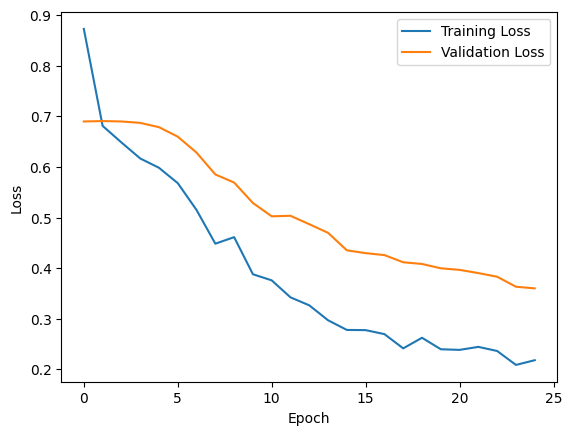

In [26]:
import matplotlib.pyplot as plt

plt.plot(model_train.history['loss'], label='Training Loss')
plt.plot(model_train.history['val_loss'], label='Validation Loss')

# Add labels to the x and y axes
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add a legend to distinguish between different lines on the plot
plt.legend()
plt.show()

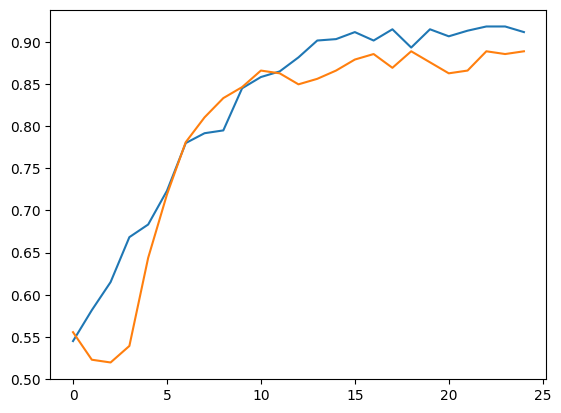

In [27]:
plt.plot(model_train.history['accuracy'], label='accuracy')
plt.plot(model_train.history['val_accuracy'], label='val_accuracy')